In [1]:
import pandas as pd
GP = pd.read_csv('googleplaystore.csv')
GP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [2]:
GP.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
GP.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [4]:
GP1=GP.dropna()
GP1.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [5]:
GP1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   object 
 4   Size            9360 non-null   object 
 5   Installs        9360 non-null   object 
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   object 
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1023.8+ KB


In [6]:
GP1.Size.value_counts()

Varies with device    1637
14M                    165
12M                    161
11M                    159
15M                    159
                      ... 
965k                     1
376k                     1
837k                     1
647k                     1
500k                     1
Name: Size, Length: 413, dtype: int64

In [7]:
##Converting all Sizes to KB
GP1['Size'] = GP1.Size.replace("Varies with device", "0")

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [8]:
GP1.Size.value_counts()

0       1637
14M      165
12M      161
15M      159
11M      159
        ... 
861k       1
499k       1
28k        1
597k       1
376k       1
Name: Size, Length: 413, dtype: int64

In [9]:
def data_clean(x):
    if 'M' in x:
        return float(x.replace('M',''))*1000
    else:
        return float(x.replace('k',''))

In [10]:
GP1.Size.astype(str)

0         19M
1         14M
2        8.7M
3         25M
4        2.8M
         ... 
10834    2.6M
10836     53M
10837    3.6M
10839       0
10840     19M
Name: Size, Length: 9360, dtype: object

In [11]:
GP1['Size_KB']=GP1.Size.astype(str).apply(data_clean)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [12]:
GP1['Size_KB'].dtype

dtype('float64')

In [13]:
## Converting Reviews to Integer
GP1['Reviews'] = GP1['Reviews'].astype(float)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [14]:
GP1['Reviews'].dtype

dtype('float64')

In [15]:
##remove ‘+’ and ','from Installs
GP1.Installs.value_counts()

1,000,000+        1576
10,000,000+       1252
100,000+          1150
10,000+           1009
5,000,000+         752
1,000+             712
500,000+           537
50,000+            466
5,000+             431
100,000,000+       409
100+               309
50,000,000+        289
500+               201
500,000,000+        72
10+                 69
1,000,000,000+      58
50+                 56
5+                   9
1+                   3
Name: Installs, dtype: int64

In [16]:
GP1['Installs'] = GP1.Installs.str.replace("+","")
GP1['Installs'] = GP1.Installs.str.replace(",","")

GP1.Installs.value_counts()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


1000000       1576
10000000      1252
100000        1150
10000         1009
5000000        752
1000           712
500000         537
50000          466
5000           431
100000000      409
100            309
50000000       289
500            201
500000000       72
10              69
1000000000      58
50              56
5                9
1                3
Name: Installs, dtype: int64

In [17]:
## Converting to Integer
GP1['Installs'] = GP1['Installs'].astype(float)
GP1['Installs'].dtype


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


dtype('float64')

In [18]:
##remove ‘$’ from Price
GP1.Price.value_counts()

0          8715
$2.99       114
$0.99       106
$4.99        70
$1.99        59
           ... 
$3.28         1
$379.99       1
$4.60         1
$4.59         1
$1.50         1
Name: Price, Length: 73, dtype: int64

In [19]:
GP1['Price'] = GP1.Price.str.replace("$","").astype(float)


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [20]:
GP1.Price.value_counts()

0.00      8715
2.99       114
0.99       106
4.99        70
1.99        59
          ... 
299.99       1
1.59         1
1.61         1
3.90         1
2.90         1
Name: Price, Length: 73, dtype: int64

In [21]:
## all of the apps have rating between 1 and 5
GP1.Rating.value_counts()

4.4    1108
4.3    1076
4.5    1037
4.2     951
4.6     823
4.1     707
4.0     567
4.7     499
3.9     386
3.8     303
5.0     274
3.7     239
4.8     234
3.6     174
3.5     163
3.4     128
3.3     102
4.9      87
3.0      83
3.1      69
3.2      63
2.9      45
2.8      42
2.6      25
2.7      25
2.5      21
2.3      20
2.4      19
1.0      16
2.2      14
1.9      13
2.0      12
1.7       8
2.1       8
1.8       8
1.6       4
1.4       3
1.5       3
1.2       1
Name: Rating, dtype: int64

In [22]:
tot=(GP1.Rating>5)&(GP1.Rating<1)
tot.value_counts()

False    9360
Name: Rating, dtype: int64

In [23]:
GP1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   float64
 4   Size            9360 non-null   object 
 5   Installs        9360 non-null   float64
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   float64
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
 13  Size_KB         9360 non-null   float64
dtypes: float64(5), object(9)
memory usage: 1.1+ MB


In [24]:
tot=GP1.Reviews>GP1.Installs
tot.value_counts()

False    9353
True        7
dtype: int64

In [25]:
GP1=GP1[GP1.Installs>GP1.Reviews]

In [26]:
tot=GP1.Reviews>GP1.Installs
tot.value_counts()

False    9351
dtype: int64

In [27]:
tot=(GP1.Type=='Free')&(GP1.Price>0)
tot.value_counts()

False    9351
dtype: int64

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

{'whiskers': [<matplotlib.lines.Line2D at 0x7f07f7b48d90>,
 'caps': [<matplotlib.lines.Line2D at 0x7f07f5a8e090>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f07f7ad2250>],
 'medians': [<matplotlib.lines.Line2D at 0x7f07f5a8e2d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f07f5a8ed90>],
 'means': []}

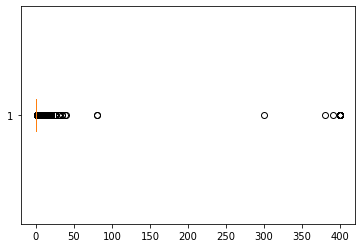

In [29]:
plt.boxplot(GP1.Price,vert=False)

In [30]:
## OBS. 1) Most of the apps have price between 0-50 and few of the apps have price greater than 300

{'whiskers': [<matplotlib.lines.Line2D at 0x7f07f59fa890>,
 'caps': [<matplotlib.lines.Line2D at 0x7f07f5a03150>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f07f59d1090>],
 'medians': [<matplotlib.lines.Line2D at 0x7f07f5a03a10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f07f5a03e50>],
 'means': []}

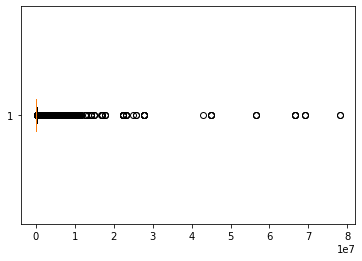

In [31]:
plt.boxplot(GP1.Reviews,vert=False)

In [32]:
## OBS.2) 1-2 apps have very high reviwes

(array([  17.,   18.,   41.,   74.,  137.,  445.,  879., 1660., 4172.,
        1908.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

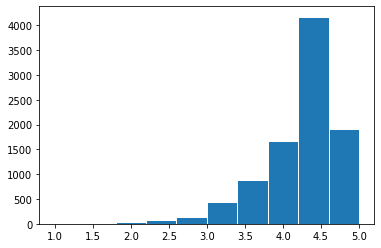

In [33]:
plt.hist(GP1.Rating, edgecolor='white')

In [34]:
##OBS. 3) Most of the apps have ratings of 4.5

(array([4777., 1386., 1036.,  617.,  464.,  334.,  234.,  174.,  125.,
         204.]),
 array([     0.,  10000.,  20000.,  30000.,  40000.,  50000.,  60000.,
         70000.,  80000.,  90000., 100000.]),
 <BarContainer object of 10 artists>)

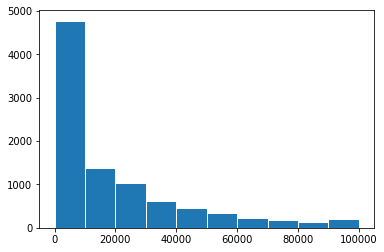

In [35]:
plt.hist(GP1.Size_KB, edgecolor='white')

In [36]:
## OBS. 4) Most of the apps have size <20000 KB

In [37]:
## OUTLIER TREATMENT

In [38]:
tot=GP1.Price>200
tot.value_counts()


False    9336
True       15
Name: Price, dtype: int64

In [39]:
GP1=GP1[GP1.Price<200]

In [40]:
##Dropping Records with Price> $200
tot=GP1.Price>200
tot.value_counts()

False    9336
Name: Price, dtype: int64

In [41]:
tot=GP1.Reviews>2000000
tot.value_counts()

False    8883
True      453
Name: Reviews, dtype: int64

In [42]:
##Dropping Records with Reviews> 2000000
GP1=GP1[GP1.Reviews<2000000]
tot=GP1.Reviews>2000000
tot.value_counts()

False    8883
Name: Reviews, dtype: int64

In [43]:
print("10th percentile : ", GP1.Installs.quantile(.10))

print("25th percentile : ",GP1.Installs.quantile(.25))

print("50th percentile : ",GP1.Installs.quantile(.50))

print("70th percentile : ",GP1.Installs.quantile(.70))

print("90th percentile : ",GP1.Installs.quantile(.90))

print("95th percentile : ",GP1.Installs.quantile(.95))

print("99th percentile : ",GP1.Installs.quantile(.99))



10th percentile :  1000.0
25th percentile :  10000.0
50th percentile :  500000.0
70th percentile :  1000000.0
90th percentile :  10000000.0
95th percentile :  10000000.0
99th percentile :  100000000.0


In [44]:
#Selecting 99 percentile as cut off based on the fact that this will be the most installed app in compared to the other apps

In [45]:
tot=GP1.Installs<=100000000
tot.value_counts()

True     8863
False      20
Name: Installs, dtype: int64

In [46]:
##Dropping Records with Reviews> 2000000
GP1=GP1[GP1.Reviews<2000000]
tot=GP1.Reviews>2000000
tot.value_counts()

False    8883
Name: Reviews, dtype: int64

<AxesSubplot:xlabel='Price', ylabel='Rating'>

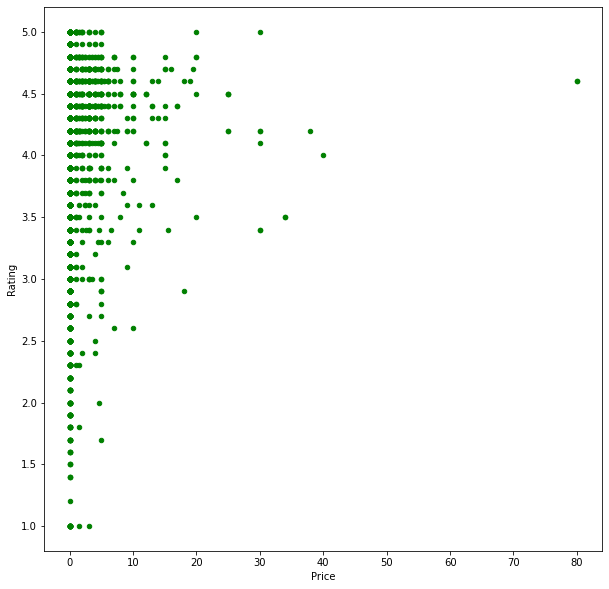

In [47]:
GP1.plot(kind='scatter',x='Price',y='Rating',figsize=(10,10),color='green')

In [48]:
## OBS1) It is not a very clear trend as free apps also have higher ratings but apps >$10 do have ratings >2.5

<AxesSubplot:xlabel='Size_KB', ylabel='Rating'>

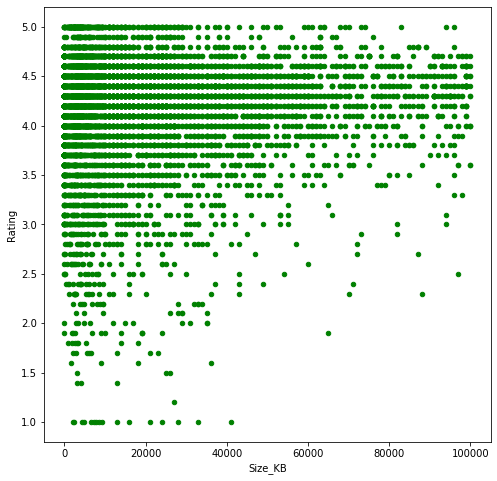

In [49]:
GP1.plot(kind='scatter',x='Size_KB',y='Rating',figsize=(8,8),color='green')

In [50]:
## OBS 2) Though high ratings are given to apps with less than 40000KB but apps >80000KB have the least rating above 2

<AxesSubplot:xlabel='Rating', ylabel='Content Rating'>

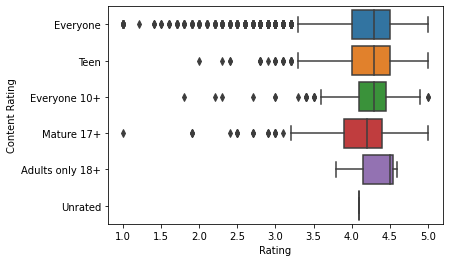

In [51]:
sns.boxplot(GP1.Rating,GP1['Content Rating'])

In [52]:
## OBS2) The median for "Adults only 18+" is higher compared to the other content ratings and can be concluded it is liked better

<AxesSubplot:xlabel='Rating', ylabel='Category'>

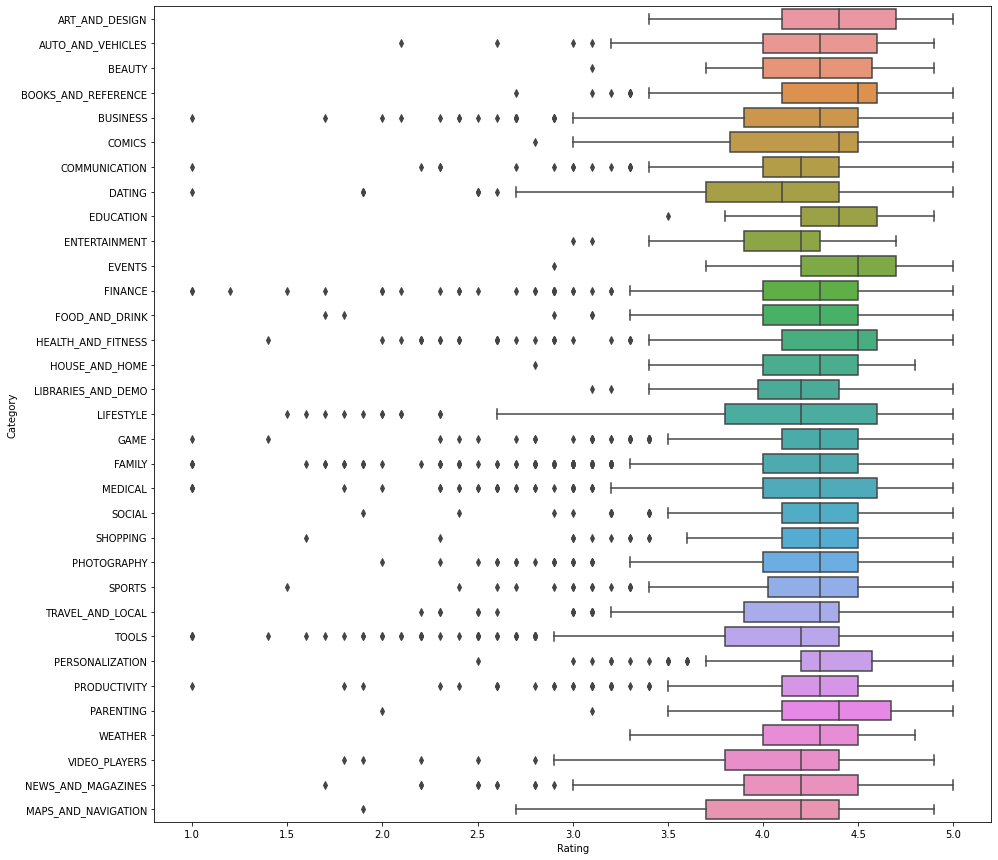

In [53]:
plt.figure(figsize=(15,15))
sns.boxplot(GP1.Rating,GP1.Category)

In [54]:
## OBS4) Highest median ratings can be seen in Health & Fitness, Books and Reference, and Events apps

In [55]:
inp1=GP1

In [56]:
import numpy as np
np.log1p(inp1.Reviews)

0         5.075174
1         6.875232
2        11.379520
3        12.281389
4         6.875232
           ...    
10834     2.079442
10836     3.663562
10837     1.609438
10839     4.744932
10840    12.894981
Name: Reviews, Length: 8883, dtype: float64

In [57]:
np.log1p(inp1.Installs)

0         9.210440
1        13.122365
2        15.424949
3        17.727534
4        11.512935
           ...    
10834     6.216606
10836     8.517393
10837     4.615121
10839     6.908755
10840    16.118096
Name: Installs, Length: 8883, dtype: float64

In [58]:
inp1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_KB
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19M,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19000.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14000.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7M,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,8700.0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25M,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,25000.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8M,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2800.0


In [59]:
## Also droping Size as Size_KB is the new variable
inp1.drop(["App", "Last Updated", "Current Ver", "Android Ver","Size"], axis=1, inplace=True)

In [60]:
inp1.head()

,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Genres,Size_KB
0,ART_AND_DESIGN,4.1,159.0,10000.0,Free,0.0,Everyone,Art & Design,19000.0
1,ART_AND_DESIGN,3.9,967.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,14000.0
2,ART_AND_DESIGN,4.7,87510.0,5000000.0,Free,0.0,Everyone,Art & Design,8700.0
3,ART_AND_DESIGN,4.5,215644.0,50000000.0,Free,0.0,Teen,Art & Design,25000.0
4,ART_AND_DESIGN,4.3,967.0,100000.0,Free,0.0,Everyone,Art & Design;Creativity,2800.0


In [61]:
inp2=pd.get_dummies(inp1,columns=['Category','Genres','Content Rating'],drop_first=True)

In [62]:
print(inp2.columns)

Index(['Rating', 'Reviews', 'Installs', 'Type', 'Price', 'Size_KB',
       'Category_AUTO_AND_VEHICLES', 'Category_BEAUTY',
       'Category_BOOKS_AND_REFERENCE', 'Category_BUSINESS',
       ...
       'Genres_Video Players & Editors',
       'Genres_Video Players & Editors;Creativity',
       'Genres_Video Players & Editors;Music & Video', 'Genres_Weather',
       'Genres_Word', 'Content Rating_Everyone', 'Content Rating_Everyone 10+',
       'Content Rating_Mature 17+', 'Content Rating_Teen',
       'Content Rating_Unrated'],
      dtype='object', length=157)


In [63]:
from sklearn.model_selection import train_test_split as split

In [65]:
## considering random state as 1
df_train, df_test= split(inp2, test_size=.30, random_state=1)
print(df_train.shape[0],df_test.shape[0],inp2.shape[0])

6218 2665 8883


In [67]:
##X_train - independent variables in train data
##Y_train - dependent variable in train data
##X_test- independent variables in train data
##Y_test- dependent variables in train data